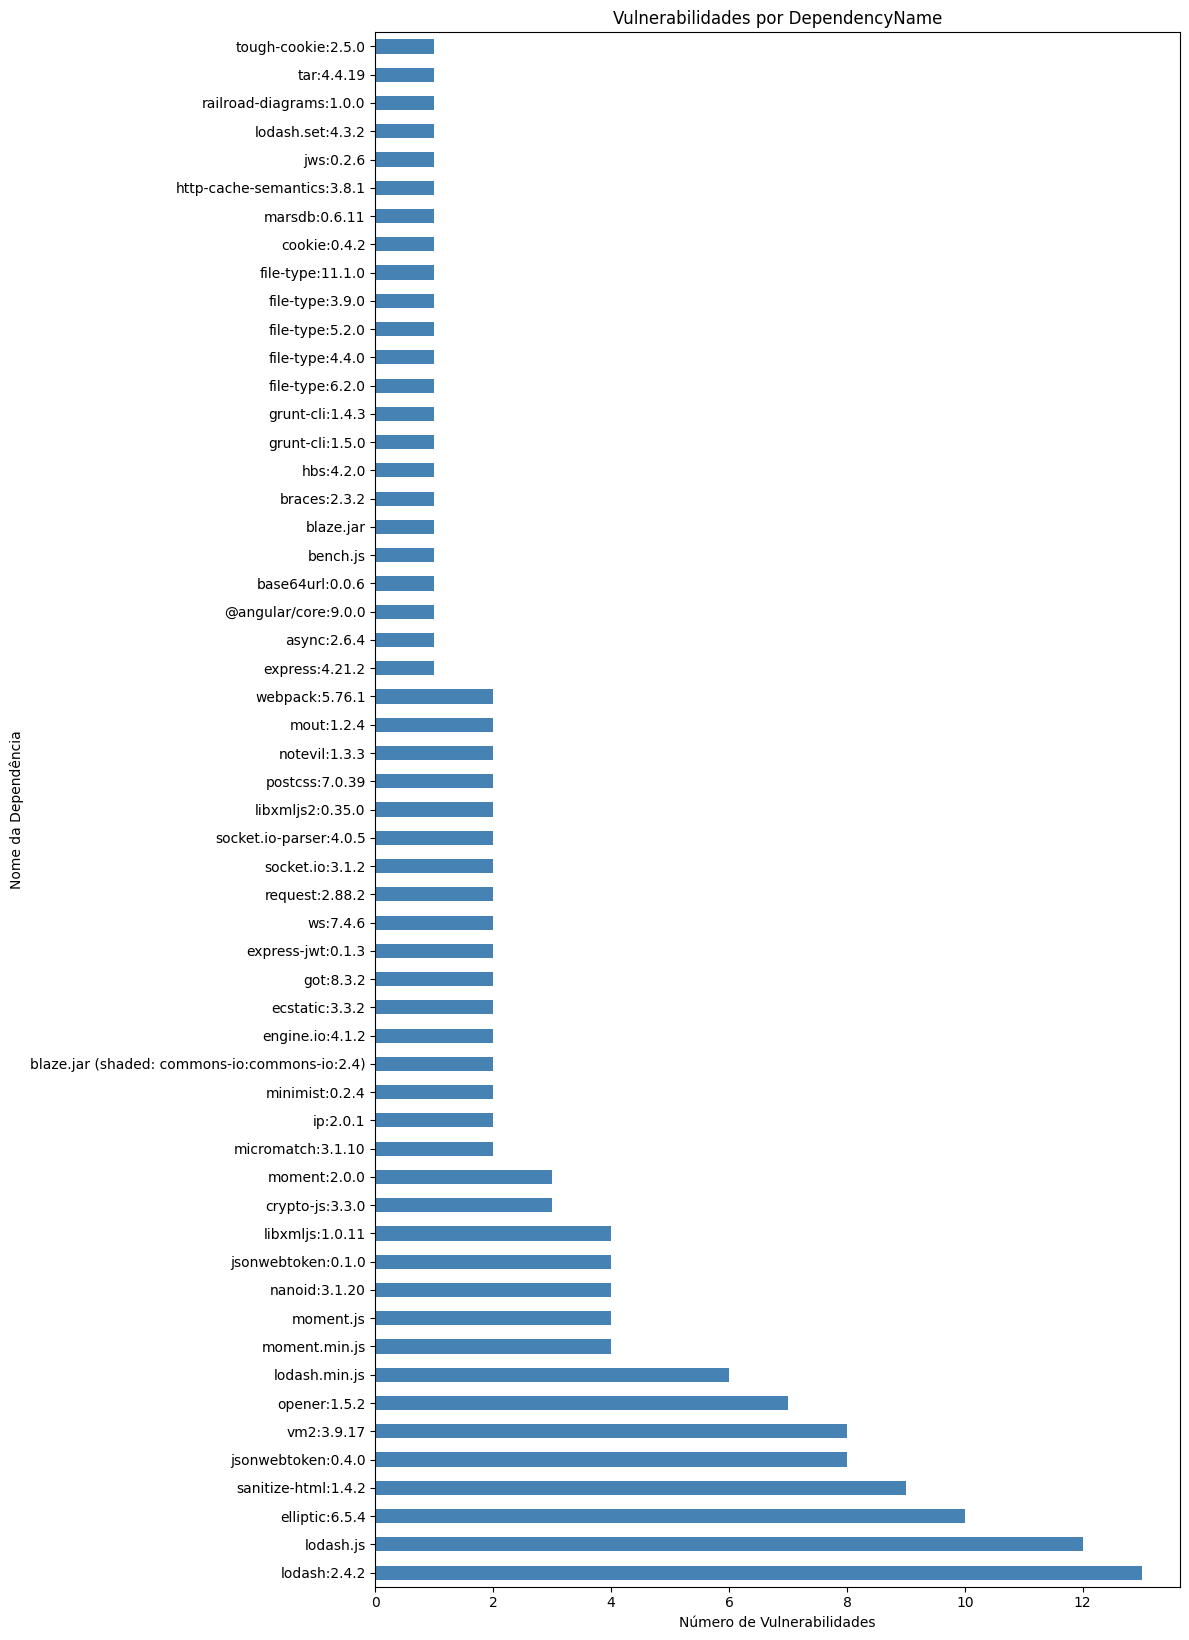

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo CSV
file_path = "dependency-check-report.csv"  # Substitua pelo caminho do seu arquivo
df = pd.read_csv(file_path)

# Contar vulnerabilidades por DependencyName
vulnerability_counts = df['DependencyName'].value_counts()

# Plotar gráfico de barras com dependências na vertical
plt.figure(figsize=(12, max(6, len(vulnerability_counts) * 0.3)))  # Altura ajustada pelo número de dependências
vulnerability_counts.plot(kind='barh', color='steelblue')
plt.title('Vulnerabilidades por DependencyName')
plt.xlabel('Número de Vulnerabilidades')
plt.ylabel('Nome da Dependência')
plt.tight_layout()
plt.show()

# Exibir o resumo em formato tabular
vulnerability_summary = vulnerability_counts.reset_index()
vulnerability_summary.columns = ['DependencyName', 'VulnerabilityCount']




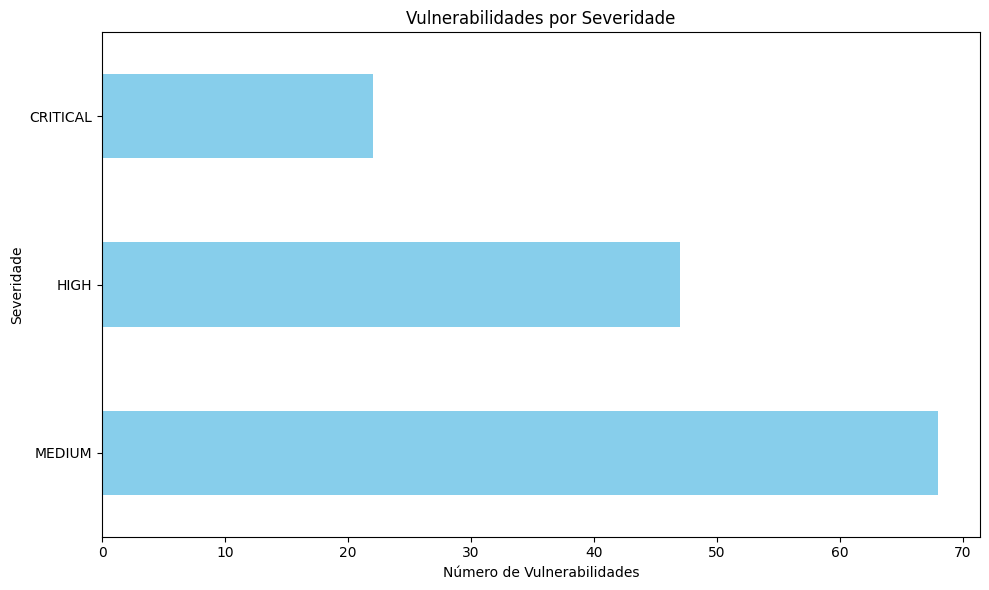

In [7]:

# Contar vulnerabilidades por severidade (Severity)
severity_counts = df['CVSSv3_BaseSeverity'].value_counts()

# Plotar gráfico de barras horizontais para vulnerabilidades por severidade
plt.figure(figsize=(10, 6))
severity_counts.plot(kind='barh', color='skyblue')
plt.title('Vulnerabilidades por Severidade')
plt.xlabel('Número de Vulnerabilidades')
plt.ylabel('Severidade')
plt.tight_layout()
plt.show()

# Exibir resumo em formato tabular
severity_summary = severity_counts.reset_index()
severity_summary.columns = ['Severity', 'VulnerabilityCount']

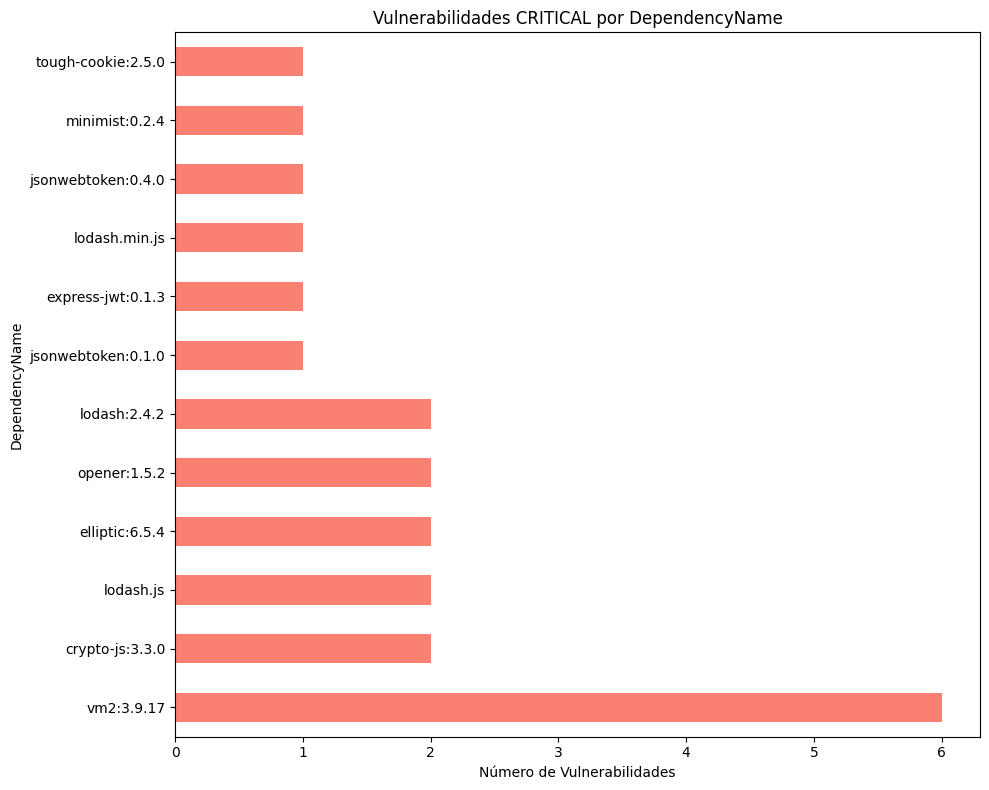

In [8]:
critical_df = df[df['CVSSv3_BaseSeverity'] == 'CRITICAL']

# Contar vulnerabilidades por DependencyName
critical_counts = critical_df['DependencyName'].value_counts()

# Plotar gráfico de barras horizontais para vulnerabilidades CRITICAL por DependencyName
plt.figure(figsize=(10, 8))
critical_counts.plot(kind='barh', color='salmon')
plt.title('Vulnerabilidades CRITICAL por DependencyName')
plt.xlabel('Número de Vulnerabilidades')
plt.ylabel('DependencyName')
plt.tight_layout()
plt.show()

# Exibir resumo em formato tabular
critical_summary = critical_counts.reset_index()
critical_summary.columns = ['DependencyName', 'VulnerabilityCount']

In [9]:

# Carregar o arquivo CSV
data = pd.read_csv("dependency-check-report.csv")

# Filtrar apenas vulnerabilidades de severidade CRITICAL
critical_data = data[data["CVSSv3_BaseSeverity"] == "CRITICAL"]

# Agrupar por DependencyName e iterar
for dependency, group in critical_data.groupby("DependencyName"):
    print("=" * 50)
    print(f"Dependency: {dependency}")
    print("=" * 50)
    for _, row in group.iterrows():
        cwe = row["CWE"] if pd.notna(row["CWE"]) else "N/A"
        description = row["Description"] if pd.notna(row["Description"]) else "No description provided."
        print(f"CWE: {cwe}")
        print(f"Description: {description}\n")
    print("\n")


Dependency: crypto-js:3.3.0
CWE: CWE-327 Use of a Broken or Risky Cryptographic Algorithm, CWE-328 Use of Weak Hash, CWE-916 Use of Password Hash With Insufficient Computational Effort
Description: JavaScript library of crypto standards.

CWE: CWE-327 Use of a Broken or Risky Cryptographic Algorithm, CWE-328 Use of Weak Hash, CWE-916 Use of Password Hash With Insufficient Computational Effort
Description: JavaScript library of crypto standards.



Dependency: elliptic:6.5.4
CWE: CWE-347 Improper Verification of Cryptographic Signature
Description: EC cryptography

CWE: CWE-347 Improper Verification of Cryptographic Signature
Description: EC cryptography



Dependency: express-jwt:0.1.3
CWE: CWE-863 Incorrect Authorization, CWE-285 Improper Authorization
Description: JWT authentication middleware.



Dependency: jsonwebtoken:0.1.0
CWE: CWE-20 Improper Input Validation, CWE-327 Use of a Broken or Risky Cryptographic Algorithm
Description: JSON Web Token implementation (symmetric and asym

In [10]:
import pandas as pd

# Carregar o arquivo CSV
data = pd.read_csv("dependency-check-report.csv")

# Filtrar apenas vulnerabilidades críticas
critical_vulns = data[data["CVSSv3_BaseSeverity"] == "CRITICAL"]

# Agrupar por DependencyName e selecionar uma vulnerabilidade por dependência
unique_critical_vulns = critical_vulns.groupby("DependencyName").first().reset_index()

# Exibir os campos principais para cada dependência
for _, row in unique_critical_vulns.iterrows():
    print("=" * 50)
    print(f"Dependency: {row['DependencyName']}")
    print(f"Description: {row['Description']}")
    print(f"CWE: {row['CWE']}")
    print(f"CVSSv3 Severity: {row['CVSSv3_BaseSeverity']}")
    print(f"CVSSv3 Score: {row['CVSSv3_BaseScore']}")
    print(f"Required Action: {row['RequiredAction']}")
    print(f"Short Description: {row['ShortDescription']}")
    print(f"Dependency Path: {row['DependencyPath']}")
    print("=" * 50)


Dependency: crypto-js:3.3.0
Description: JavaScript library of crypto standards.
CWE: CWE-327 Use of a Broken or Risky Cryptographic Algorithm, CWE-328 Use of Weak Hash, CWE-916 Use of Password Hash With Insufficient Computational Effort
CVSSv3 Severity: CRITICAL
CVSSv3 Score: 9.100000381469728
Required Action: nan
Short Description: nan
Dependency Path: /home/corisco/pgcs/code-review/juice-shop/package-lock.json?pdfkit:0.11.0/crypto-js:^3.1.9-1
Dependency: elliptic:6.5.4
Description: EC cryptography
CWE: CWE-347 Improper Verification of Cryptographic Signature
CVSSv3 Severity: CRITICAL
CVSSv3 Score: 9.100000381469728
Required Action: nan
Short Description: nan
Dependency Path: /home/corisco/pgcs/code-review/juice-shop/frontend/package-lock.json?/elliptic:6.5.4
Dependency: express-jwt:0.1.3
Description: JWT authentication middleware.
CWE: CWE-863 Incorrect Authorization, CWE-285 Improper Authorization
CVSSv3 Severity: CRITICAL
CVSSv3 Score: 9.1
Required Action: nan
Short Description: n